<a href="https://colab.research.google.com/github/bukshalishah/Deep-Learning/blob/master/IMDB_DataSet%2088.88%25%20Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras import layers
from keras import models
from keras import activations
from keras import optimizers
from keras import losses
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
max(max(sequence) for sequence in train_data)

9999

In [4]:
# Decode

word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

decode_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
  

In [0]:
x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.5087 - acc: 0.7813 - val_loss: 0.3801 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.3008 - acc: 0.9053 - val_loss: 0.3006 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2181 - acc: 0.9279 - val_loss: 0.3086 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1751 - acc: 0.9434 - val_loss: 0.2841 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1150 - acc: 0.9654 - val_loss: 0.3157 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - 

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

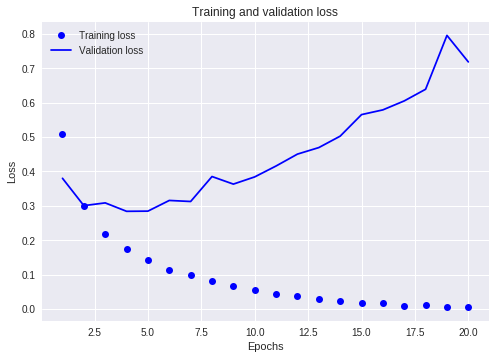

In [17]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

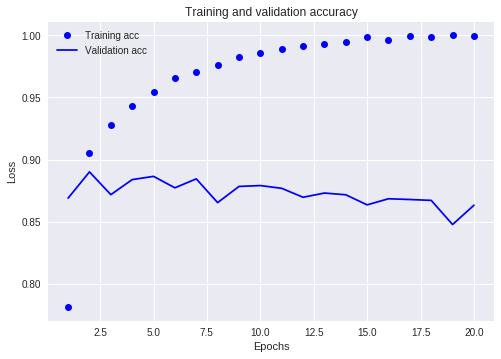

In [18]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(1024, activation=activations.relu, input_shape=(10000,)))
model.add(layers.Dense(1024, activation=activations.relu))
model.add(layers.Dense(1024, activation=activations.relu))
model.add(layers.Dense(1, activation=activations.sigmoid))

model.compile(optimizer=optimizers.rmsprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=5, batch_size=1024)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_accuracy, "\nTest Loss: ", test_loss)

Epoch 1/5
25000/25000 [==============================] - 26s 1ms/step - loss: 0.9661 - binary_accuracy: 0.6916
Epoch 2/5
25000/25000 [==============================] - 26s 1ms/step - loss: 0.3714 - binary_accuracy: 0.8576
Epoch 3/5
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2063 - binary_accuracy: 0.9168
Epoch 4/5
25000/25000 [==============================] - 26s 1ms/step - loss: 0.1501 - binary_accuracy: 0.9441
Epoch 5/5
25000/25000 [==============================] - 21s 859us/step
Test Accuracy:  0.88856 
Test Loss:  0.39380074107170104
